# Chapter 1: Fundamentals


## Goal:
Here the the fundamentals & terminologies in Statistics and Machine Learning are covered. It starts with statistical analysis to ML terminologies. In the further chapters, each ML model with statistical analysis in details will be dicussed. 


### Machine Learning categories:
- Supervised Learning: algorithms learnfrom data provided with lables, aication -> Classification, Regression
- Unsupervised Learning: algorithms learn by themselves without any provided label, application -> Clustering, Dimensionality reduction
- Reinforcement Learning: algorithms learn based on feedbacks from an agent.
- Semi-Supervised: ML methods executed on small amount of labeled data and large amount of ulabeled data during training.

### Machine Learning development step by step:
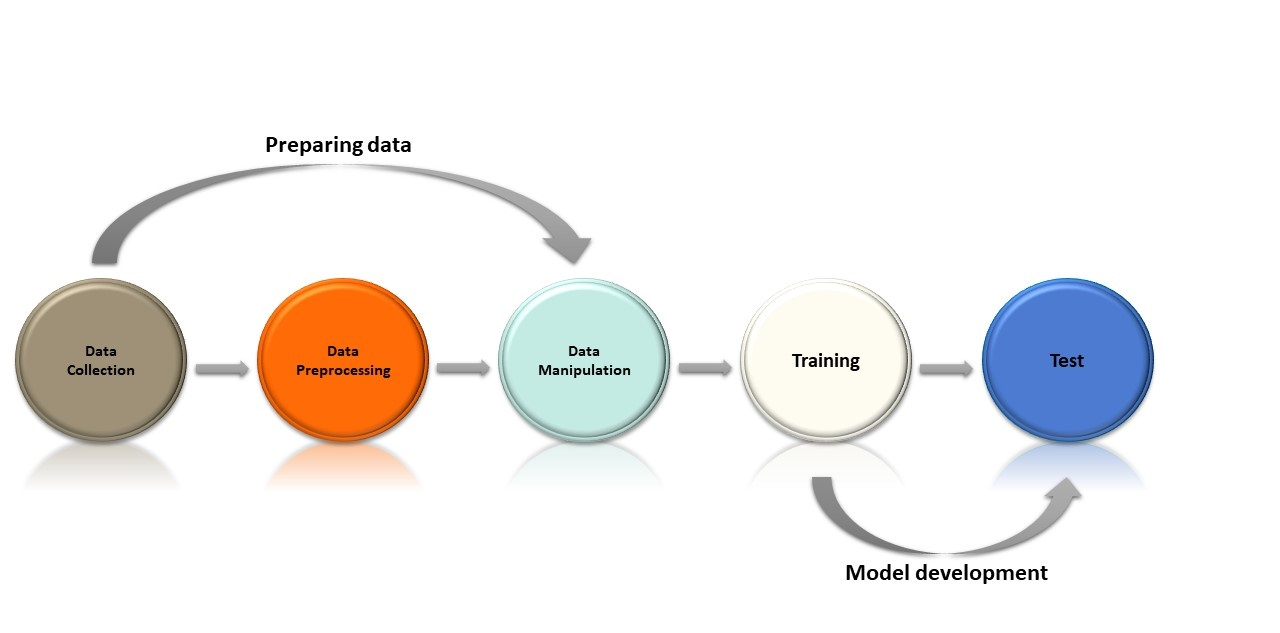

## 1 Statistical analysis
let's first ask this question: why do we need statistical analysis?
tatistical analysis provides a systematic framework for understanding and interpreting data, extracting meaningful insights, and making informed decisions. IN SIMPLE WORDS, we have to know our data then we can work with it!

We use statistics to describe our data:

### A- Basic statistics
#### 1- Mean
#### 2- Median
#### 3- Mode
#### 4- Range
#### 5- Standard deviation
#### 6- Quantiles
#### IQR
#### 7- Outlier (3 methods detection + removal)
#### 8- Distribution

### C- Evaluation metrics
#### Confusion matrix
#### 11- TP
#### 12- TN
#### 13- FP
#### 14- FN
#### 15- Precision (P)
#### 16- Recall (R)
#### 17- F1-score
#### 18- Specificity
#### 19- ROC
#### 20- R-squared
#### OR (Odds ratio)
#### 21- Adjusted R-squared
#### 22- MLE
#### 23- AIC
#### 24- Entropy
#### 25- Gini

### C- Probability:
#### Bays rule

### D- Statistical tests
#### Distribution (Normal or not?)
#### correlation
#### Hypothesis
#### 7- What is P-value?
#### 8- Type I and Type II error
#### 9- Chi-square
#### 10- Anova

## A- Basic Statistics:

In [1]:
print("------------------------------------------------- measure of variation -------------------------------------------------")

# Required libraries:
import numpy as np
import pandas as pd
from scipy import stats
from statistics import variance, stdev
import matplotlib.pyplot as plt
import plotly.express as px


# dataset
data = np.array([-111, -5, -4, -3, -4, -3, -2, 0, 1, 2, 2, 2, 2, 2, 3, 4, 3, 4, 9])

####################################################################
### 1- What are central values that our data is located around (Central Tendency (CT))
## Mean
data_mean = np.mean(data); print("Mean: ", data_mean)

## Median
data_median = np.median(data) ; print("Median: ", data_median)

## Mode
data_mode = stats.mode(data); print("Mode: ", data_mode[0][0])


####################################################################
### 2- Variation of our data or how it is spreaded
## Variance: mean of squared deviation from the mean
data_var = variance(data); print("sample variance: ", data_var)

## Standard Deviation: square root of variance --> the dispersion with respect to the original variable/
data_std = stdev(data); print("Standard Variation: ", data_std)

## Range
data_rng = np.max(data, axis = 0) - np.min(data, axis = 0); print("Range: ", data_rng)

## Quantiles
print("Quartiles: ")

for val in [25, 50, 75]:
    data_qntls = np.percentile(data, val); print(str(val)+"%", data_qntls)
    
# Calculate IQR (Interquantile Range)
q75, q25 = np.percentile(data, [75, 25]); print("IQR: ", q75 - q25)



------------------------------------------------- measure of variation -------------------------------------------------
Mean:  -5.157894736842105
Median:  2.0
Mode:  2
sample variance:  669
Standard Variation:  25.865034312755125
Range:  120
Quartiles: 
25% -3.0
50% 2.0
75% 2.5
IQR:  5.5


In [12]:
####################################################################
### Outlier - Detection:
df = pd.read_csv ("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15810888,Female,45,250000,1
3,15668575,Female,26,43000,0
4,15603246,Female,27,57000,0


In [14]:
# Ploting method 1
px.line(data_frame = df, x='Age', y='EstimatedSalary',title='Looking for outliers')

In [15]:
#Ploting method 2:
px.box(data_frame = df, x = "EstimatedSalary")

In [16]:
#ploting method 3:
px.violin(data_frame = df, x = 'EstimatedSalary')

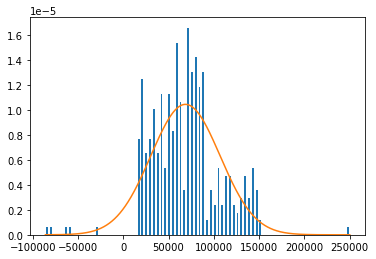

In [17]:
#ploting method 4:
plt.hist(df.EstimatedSalary, bins = 80, rwidth = 0.5, density = True)

rng = np.arange(df.EstimatedSalary.min(), df.EstimatedSalary.max(), 0.1)
plt.plot(rng, stats.norm.pdf(rng, df.EstimatedSalary.mean(), df.EstimatedSalary.std()))


In [18]:
# Statistical methods (IQR):
for val in [25, 50, 75]:
    data_qntls = np.percentile(df.EstimatedSalary, val); print(str(val)+"%", data_qntls)
    
# Calculate IQR (Interquantile Range)
q75, q25 = np.percentile(df.EstimatedSalary, [75, 25]); 
IQR = q75 - q25; print("IQR: ", q75 - q25)

# Statistical method 1: IQR/ Box
lower_band = q25 - (1.5*IQR); print ("lower band: ", lower_band)
upper_band = q75 + (1.5*IQR); print ("upper band: ", upper_band)
# outlier:
df[(df.EstimatedSalary>upper_band) | (df.EstimatedSalary<lower_band)]


25% 43000.0
50% 68500.0
75% 88000.0
IQR:  45000.0
lower band:  -24500.0
upper band:  155500.0


,User ID,Gender,Age,EstimatedSalary,Purchased
2,15810888,Female,45,250000,1
5,15603346,Female,37,-60000,1
11,15727311,Female,35,-65000,0
12,15570769,Female,26,-80000,0
14,15746139,Male,20,-86000,0
20,15704583,Male,46,-28000,1


In [19]:
# Statistical method 2: std 
lower_limit = df.EstimatedSalary.mean() - 3*df.EstimatedSalary.std(); print("lower limit: ", lower_limit)
upper_limit = df.EstimatedSalary.mean() + 3*df.EstimatedSalary.std(); print("upper limit: ", upper_limit)
df[(df.EstimatedSalary>upper_limit) | (df.EstimatedSalary<lower_limit)]


lower limit:  -45996.76806560061
upper limit:  183155.97204570012


,User ID,Gender,Age,EstimatedSalary,Purchased
2,15810888,Female,45,250000,1
5,15603346,Female,37,-60000,1
11,15727311,Female,35,-65000,0
12,15570769,Female,26,-80000,0
14,15746139,Male,20,-86000,0


In [20]:
# Statistical method 3: Z_score: how much each sample is away from mean
df['Zscore'] = (df.EstimatedSalary - df.EstimatedSalary.mean())/df.EstimatedSalary.std()
df.head()
df[(df.Zscore>3) | (df.Zscore<-3)]

,User ID,Gender,Age,EstimatedSalary,Purchased,Zscore
2,15810888,Female,45,250000,1,4.750205
5,15603346,Female,37,-60000,1,-3.366652
11,15727311,Female,35,-65000,0,-3.497569
12,15570769,Female,26,-80000,0,-3.890321
14,15746139,Male,20,-86000,0,-4.047421


In [21]:
# Remove outliers: Using Box method
df_clean = df[(df.EstimatedSalary<upper_band) & (df.EstimatedSalary>lower_band)]

#Plot
px.box(data_frame = df_clean, x = "EstimatedSalary", title = "removing outliers using BOX method")

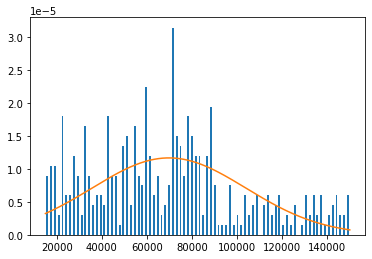

In [22]:
#Looking for Skewness:
plt.hist(df_clean.EstimatedSalary, bins = 80, rwidth = 0.5, density = True)

rng = np.arange(df_clean.EstimatedSalary.min(), df_clean.EstimatedSalary.max(), 0.1)
plt.plot(rng, stats.norm.pdf(rng, df_clean.EstimatedSalary.mean(), df_clean.EstimatedSalary.std()))


In [24]:
print("------------------------------------------- Hypothesis testing (IN PROGRESS) -------------------------------------------")
# Required libraries:
from scipy import stats

# dataset measures
print ("First method: ")
xbar = 990; mu0 = 1000; s = 12.5; n = 30
# Test Statistic
t_smple = (xbar-mu0)/(s/np.sqrt(float(n))); print ("Test Statistic:",round(t_smple,2))
# Critical value from t-table
alpha = 0.05
t_alpha = stats.t.ppf(alpha,n-1); print ("Critical value from t-table:",round(t_alpha,3))
#Lower tail p-value from t-table
p_val = stats.t.sf(np.abs(t_smple), n-1); print ("Lower tail p-value from t-table", p_val)


############################################## How to calculate P_value ##############################################
print ("Second method: ")
# Given data
mean_given = 1000
num_sample = 30
standard_deviation = 12.5
sample_mean = 990

# Calculate the standard error of the mean
standard_error = standard_deviation / (num_sample ** 0.5)

# Perform the one-sample t-test
t_statistic = (sample_mean - mean_given) / standard_error
print ("Test Statistic:",t_statistic)

# Degrees of freedom for the t-distribution
degrees_of_freedom = num_sample - 1

# Calculate the two-tailed p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), degrees_of_freedom))

print("P-value:", p_value)

------------------------------------------- Hypothesis testing (IN PROGRESS) -------------------------------------------
First method: 
Test Statistic: -4.38
Critical value from t-table: -1.699
Lower tail p-value from t-table 7.035025729010886e-05
Second method: 
Test Statistic: -4.381780460041329
P-value: 0.00014070051458014987


#### Note: Here a conflict happened! I need a better understanding on other tests and distributions to understand what I am doing!
### In "Hypothesis testing" I have to for just one time go in details in various statistical tests and I am supposed to use them!!! SO, I cannot mention P_value concept here without mentioning other methods, and I cannot skip P_value as it's important in model selection, feature selection and etc.